# DTSC-670 Foundations of Machine Learning
## Assignment 4
### Name: Haneeefuddin Rasheed

## Copyright & Academic Integrity Notice
<span style="color:red">The assignment materials provided are exclusively for students officially enrolled in the course and are intended solely for purposes associated with the course. It is strictly prohibited to distribute these materials to others. Students are expressly forbidden from uploading these documents, parts of this assignment, or solutions to any external platforms such as websites, GitHub repositories, or personal websites.</span>

<span style="color:red">By submitting your document to CodeGrade, you are acknowledging that you fully understand the Academic Integrity policy as outlined in both the Program Handbook and the course syllabus. All submitted work must be solely your own, and any form of collaboration is strictly prohibited. You must not seek solutions online or submit them to any external websites. At the end of the term, plagiarism tracking software will be used for this assignment. Violations of the Academic Integrity policy will result in failure on the assignment, failure in the class, and/or dismissal from the program.</span> 

## Student Learning Objectives

- Understand the evaluation metrics employed for assessing prediction performance in classification systems.
- Develop custom functions for calculating these metrics and compare them to Scikit-Learn's results.
- Students should be able to proficiently reuse functions to obtain variables to create a ROC curve.

## CodeGrade
This assignment will be automatically graded through CodeGrade, and you will have unlimited submission attempts. To ensure successful grading, please follow these instructions carefully: Name your notebook as `assignment_4.ipynb` before submission, as CodeGrade requires this specific filename for grading purposes. Additionally, make sure there are no errors in your notebook, as CodeGrade will not be able to grade it if errors are present. Before submitting, we highly recommend restarting your kernel and running all cells again to ensure that there will be no errors when CodeGrade runs your script.

## Assignment Overview
The purpose of this assignment is to familiarize you with the metrics used to measure prediction performance in classification systems.  You will be tasked with developing custom Python functions to compute these metrics and subsequently, comparing the outcomes with Scikit-Learn's pre-existing implementations.  Creating these custom functions will allow you to better understand the metrics and how they are computed.

### Data
The data for this assignment comes from two separate files:
- `true_labels.csv` : these are the `y_test` labels from the census income dataset in the previous assignment
- `predicted_proba.csv` : these are the predicted probabilities ([predict_proba()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) in sklearn) of our final predictions in the previous assignment

### Assignment Instructions
Walk through the assignment and create the custom functions as requested.  It is very important that all written functions have the function parameters in the same order as given to you in the respective instructions.  

Do not use the built-in Scikit-Learn functions when creating your functions from scratch.  Instead, you may use those functions after to verify your calculations.  Your assignments will be checked and points will be manually taken off if you use Scikit-Learn functions in your created functions.

<u style="color:red;">**Important: Do not round any of your outputs unless directed to do so or CodeGrade will count them as incorrect**</u>

Once you have completed all the tasks, you are ready to submit your assignment to CodeGrade for testing. Please restart your notebook's kernel and run your code from the beginning to ensure there are no error messages. Once you have verified that the code runs without any issues, submit your .ipynb notebook file to CodeGrade for evaluation. Your notebook should be called `assignment_4.ipynb`. You have unlimited attempts for this assignment. 

## Standard Imports<a name="import"></a>
Run the code block below to import your standard imports and setup the notebook for CodeGrade grading.

In [1]:
# standard imports
import pandas as pd
import numpy as np

# imports
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Do not change this option; This allows the CodeGrade auto grading to function correctly
pd.set_option('display.max_columns', 20)

C:\Users\Haneef\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Get the Data
Execute the following code snippet to import the data required for this assignment. Ensure that the CSV files are located in the same directory as your notebook.  We will import these as Python lists since students might find it more convenient to work with lists when creating their functions from scratch.

In [2]:
# import the true lables
true_labels = pd.read_csv('true_labels.csv')

# import the predicted probabilities as a list
probs = pd.read_csv('predicted_proba.csv').values.flatten().tolist()

# turn the true labels into an array of 0s and 1s
# check Scikit-Learn's documentation for information on LabelEncoder()
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
true_labels = le.fit_transform(true_labels.values.ravel()).tolist()

# Calculate Model Predictions

Begin by writing a function from scratch called `predict()` that accepts as input the following (in this exact order):
- a list of prediction probabilities (as a list) 
- threshold value (as a float)

This function should compute the final predictions to be output by the model and return them as a list.  If a prediction probability value is less than the threshold value, then the prediction is the negative case (i.e. 0).  If a prediction probability value is greater than or equal to the threshold value, then the prediction is the positive case (i.e. 1).

In [3]:
def predict(probabilities, threshold):
    """
    Predicts final model output based on a list of prediction probabilities and a threshold.

    :param probabilities: List of prediction probabilities
    :param threshold: Float representing the threshold value
    :return: List of predictions (0s and 1s)
    """
    return [1 if prob >= threshold else 0 for prob in probabilities]


Next, we will create a variable called `thresh` that has the value 0.5 which is the threshold value that we will use to make our predictions.  Then invoke the `predict()` function to calculate the model predictions using the `probs` list that you imported earlier and the `thresh` variable.  Save this output as `preds`.

In [4]:
# Function to predict based on probabilities and a threshold
def predict(probabilities, threshold):
    """
    Predicts final model output based on a list of prediction probabilities and a threshold.

    :param probabilities: List of prediction probabilities
    :param threshold: Float representing the threshold value
    :return: List of predictions (0s and 1s)
    """
    return [1 if prob >= threshold else 0 for prob in probabilities]

# Threshold value
thresh = 0.5

# Calculate model predictions using the predict() function
preds = predict(probs, thresh)

# Display the model predictions
print("Model Predictions: ", preds)


Model Predictions:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0

# Calculate the Model Accuracy

Write a function from scratch called `acc_score()` that accepts as input (in this exact order):
- a list of true labels
- a list of model predictions

This function should calculate the model accuracy score using the true labels as compared to the predictions.  

In [5]:
# Function to calculate model accuracy score
def acc_score(true_labels, model_predictions):
    """
    Calculates the accuracy score of a model.

    :param true_labels: List of true labels (0s and 1s)
    :param model_predictions: List of model predictions (0s and 1s)
    :return: Accuracy score as a float
    """
    # Check the length of both lists
    if len(true_labels) != len(model_predictions):
        raise ValueError("Length of true_labels and model_predictions must be the same.")
    
    # Calculate accuracy score
    correct_predictions = sum(1 for true, pred in zip(true_labels, model_predictions) if true == pred)
    total_predictions = len(true_labels)
    accuracy = correct_predictions / total_predictions
    
    return accuracy

# Example usage of the acc_score() function
# Replace 'true_labels' and 'preds' with your actual data
example_true_labels = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
example_model_predictions = [0, 1, 1, 0, 0, 1, 0, 1, 1, 0]
accuracy = acc_score(example_true_labels, example_model_predictions)
print("Accuracy Score: {:.2f}".format(accuracy))


Accuracy Score: 0.80


Now, compute the accuracy score using your function `acc_score`, and pass as input the true labels (`true_labels` imported earlier) and the model predictions you calculated above (`preds`).  Save this as the variable `accuracy`.  

In [6]:
# Function to calculate model accuracy score
def acc_score(true_labels, model_predictions):
    """
    Calculates the accuracy score of a model.

    :param true_labels: List of true labels (0s and 1s)
    :param model_predictions: List of model predictions (0s and 1s)
    :return: Accuracy score as a float
    """
    # Check if lengths of both lists match
    if len(true_labels) != len(model_predictions):
        raise ValueError("Length of true_labels and model_predictions must be the same.")
    
    # Calculate accuracy score
    correct_predictions = sum(true == pred for true, pred in zip(true_labels, model_predictions))
    total_predictions = len(true_labels)
    accuracy = correct_predictions / total_predictions
    
    return accuracy

# Calculate accuracy score using the acc_score() function
accuracy = acc_score(true_labels, preds)

# Display the model accuracy
print("Model Accuracy: {:.4f}".format(accuracy))


Model Accuracy: 0.8466


**Code Check:** Use the Scikit-Learn's [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function to check that the value you computed using `acc_score()` is correct.

In [7]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score using Scikit-Learn's accuracy_score() function
sklearn_accuracy = accuracy_score(true_labels, preds)

# Display the model accuracy using Scikit-Learn's function
print("Scikit-Learn Accuracy: ", sklearn_accuracy)


Scikit-Learn Accuracy:  0.8466144633809305


# Calculate the Model Error Rate

Write a function from scratch called `error_rate()` that accepts as input (in this exact order):
- a list of true labels
- a list of model predictions

This function should calculate the model error rate and should use your `acc_score()` function that you previously defined. 

In [8]:
# Function to calculate model error rate
def error_rate(true_labels, model_predictions):
    """
    Calculates the error rate of a model.

    :param true_labels: List of true labels (0s and 1s)
    :param model_predictions: List of model predictions (0s and 1s)
    :return: Error rate as a float
    """
    # Calculate accuracy using the acc_score() function
    accuracy = acc_score(true_labels, model_predictions)
    
    # Calculate error rate as (1 - accuracy)
    error_rate = 1 - accuracy
    
    return error_rate

# Example usage of the error_rate() function
# Replace 'true_labels' and 'preds' with your actual data
example_true_labels = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
example_model_predictions = [0, 1, 1, 0, 0, 1, 0, 1, 1, 0]
error = error_rate(example_true_labels, example_model_predictions)
print("Error Rate: {:.4f}".format(error))


Error Rate: 0.2000


Now, compute the model error rate for the true labels and the model predictions previously given.  Save this as the variable `error`.

In [9]:
# Function to calculate model error rate
def error_rate(true_labels, model_predictions):
    """
    Calculates the error rate of a model.

    :param true_labels: List of true labels (0s and 1s)
    :param model_predictions: List of model predictions (0s and 1s)
    :return: Error rate as a float
    """
    # Calculate accuracy using the acc_score() function
    accuracy = acc_score(true_labels, model_predictions)
    
    # Calculate error rate as (1 - accuracy)
    error_rate = 1 - accuracy
    
    return error_rate

# Calculate error rate using the error_rate() function
error = error_rate(true_labels, preds)

# Display the model error rate
print("Model Error Rate: ", error)


Model Error Rate:  0.1533855366190695


# Calculate the Model Precision and Recall

Write a function from scratch called `prec_recall_score()` that accepts as input (in this exact order):
- a list of true labels 
- a list of model predictions

This function should compute and return _both_ the model precision and recall (in that order).  

Do not use the built-in Scikit-Learn functions `precision_score()`,`recall_score()`, `confusion_matrix()`, or Panda's `crosstab()` to do this.  Instead, you may use those functions after to verify your calculations. We want to ensure that you understand what is going on behind-the-scenes of the precision and recall functions by creating similar ones from scratch.  

In [10]:
# Function to calculate model precision and recall
def prec_recall_score(true_labels, model_predictions):
    """
    Calculates the precision and recall of a model.

    :param true_labels: List of true labels (0s and 1s)
    :param model_predictions: List of model predictions (0s and 1s)
    :return: Tuple containing (precision, recall)
    """
    # Initialize counters for true positives, false positives, and false negatives
    tp = 0
    fp = 0
    fn = 0

    # Calculate TP, FP, and FN
    for true, pred in zip(true_labels, model_predictions):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 1 and pred == 0:
            fn += 1
    
    # Calculate precision and recall
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    return precision, recall

# Example usage of the prec_recall_score() function
# Replace 'true_labels' and 'preds' with your actual data
example_true_labels = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
example_model_predictions = [0, 1, 1, 0, 0, 1, 0, 1, 1, 0]
precision, recall = prec_recall_score(example_true_labels, example_model_predictions)
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))


Precision: 0.8000
Recall: 0.8000


Use your `prec_recall_score` function to compute `precision` and `recall` for the true labels (`true_labels`) and the model predictions (`preds`) you calculated previously.  Save your output as `precision` and `recall` respectively.

In [11]:
# Calculate precision and recall using the prec_recall_score() function
precision, recall = prec_recall_score(true_labels, preds)

# Display the precision and recall
print("Precision = {:.4f}".format(precision))
print("Recall = {:.4f}".format(recall))


Precision = 0.7162
Recall = 0.5797


**Code Check:** Use Scikit-Learn's `precision_score()` and `recall_score()` to verify that your calculations above are correct:

In [12]:
from sklearn.metrics import precision_score

# Calculate precision using Scikit-Learn's precision_score() function
sklearn_precision = precision_score(true_labels, preds)

# Display Sklearn Precision Score
print("Sklearn Precision Score: {:.4f}".format(sklearn_precision))


Sklearn Precision Score: 0.7162


In [13]:
from sklearn.metrics import recall_score

# Calculate recall using Scikit-Learn's recall_score() function
sklearn_recall = recall_score(true_labels, preds)

# Display Sklearn Recall Score
print("Sklearn Recall Score: {:.4f}".format(sklearn_recall))


Sklearn Recall Score: 0.5797


# Calculate $F_\beta$ Scores

Write a function from scratch called `f_beta` that computes the $F_\beta$ measure for any value of $\beta$.  

- This function must invoke the `prec_recall_score` function you wrote above in order to obtain the values for precision and recall.  
- The function must take as input (in this exact order):
    - a list of true labels
    - a list of model predictions you calculated previously
    - the value of $\beta$ you wish to use in the calculation 
    
We defined $F_\beta$ in class to be:

$$ F_\beta = \frac{(\beta^2+1) \cdot Pr \cdot Re}{\beta^2 \cdot Pr + Re} $$

In [14]:
# Function to calculate F_beta measure
def f_beta(true_labels, model_predictions, beta):
    """
    Calculates the F_beta measure for a model.

    :param true_labels: List of true labels (0s and 1s)
    :param model_predictions: List of model predictions (0s and 1s)
    :param beta: Value of beta to use in the calculation
    :return: F_beta measure as a float
    """
    # Calculate precision and recall using the prec_recall_score() function
    precision, recall = prec_recall_score(true_labels, model_predictions)
    
    # Calculate F_beta measure
    beta_squared = beta ** 2
    f_beta = (beta_squared + 1) * (precision * recall) / ((beta_squared * precision) + recall) if ((beta_squared * precision) + recall) > 0 else 0
    
    return f_beta

# Example usage of the f_beta() function
# Replace 'true_labels', 'preds', and 'beta' with your actual data and desired beta value
example_true_labels = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
example_model_predictions = [0, 1, 1, 0, 0, 1, 0, 1, 1, 0]
example_beta = 1.0  # Replace with your desired beta value
f_beta_value = f_beta(example_true_labels, example_model_predictions, example_beta)
print("F_beta Measure: {:.4f}".format(f_beta_value))


F_beta Measure: 0.8000


Now, use your `f_beta` function to compute the $F_1$ score for the true labels and the model predictions you calculated previously.  Save your output as `F1`.

In [15]:
# Calculate F1 score using the f_beta() function with beta=1
beta = 1.0  # Set beta to 1 for F1 score
F1 = f_beta(true_labels, preds, beta)

# Display the F1 score
print("F1 = ", F1)


F1 =  0.6407766990291262


**Code Check:** Verify your above calculation is correct by invoking Scikit-Learn's `f1_score` function.

In [16]:
from sklearn.metrics import f1_score

# Calculate F1 score using Scikit-Learn's f1_score() function
sklearn_f1 = f1_score(true_labels, preds)

# Display the F1 score calculated using Scikit-Learn
print("Scikit-Learn F1 Score: ", sklearn_f1)


Scikit-Learn F1 Score:  0.6407766990291262


# Calculate the TPR and FPR for ROC Curve

In the subsequent cells, you will be asked to plot an ROC curve.  The ROC curve plots the True Positive Rate (TPR, also called recall) against the False Positive Rate (FPR).  Both of these are scalar values, akin to precision and recall.

Write a function from scratch called `TPR_FPR_score` that is nearly identical to `prec_recall_score` that you wrote previously, which computes and returns TPR and FPR (in that order).  The function must take as input (in this exact order):
- a list of true labels 
- a list of model predictions you calculated previously

TPR and FPR are defined as follows:

$$ TPR = recall = \frac{TP}{TP + FN} $$

$$ FPR = \frac{FP}{FP + TN} $$

In [17]:
# Function to calculate TPR (True Positive Rate) and FPR (False Positive Rate)
def TPR_FPR_score(true_labels, model_predictions):
    """
    Calculates the TPR (True Positive Rate) and FPR (False Positive Rate) of a model.

    :param true_labels: List of true labels (0s and 1s)
    :param model_predictions: List of model predictions (0s and 1s)
    :return: Tuple containing (TPR, FPR)
    """
    # Initialize counters for true positives, false negatives, true negatives, and false positives
    tp = 0
    fn = 0
    tn = 0
    fp = 0

    # Calculate TP, FN, TN, and FP
    for true, pred in zip(true_labels, model_predictions):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 1 and pred == 0:
            fn += 1
        elif true == 0 and pred == 0:
            tn += 1
        elif true == 0 and pred == 1:
            fp += 1
    
    # Calculate TPR (True Positive Rate) and FPR (False Positive Rate)
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    return tpr, fpr


**Code Check:** Invoke the `TPR_FPR_score` function using your `labels` and `preds` from previous steps.  Your output should be the following:  `(0.5797007156798959, 0.07094051446945338)`

In [18]:
# Invoke the TPR_FPR_score function with your labels and preds
tpr, fpr = TPR_FPR_score(true_labels, preds)

# Display the TPR and FPR
print("TPR (True Positive Rate):", tpr)
print("FPR (False Positive Rate):", fpr)


TPR (True Positive Rate): 0.5797007156798959
FPR (False Positive Rate): 0.07094051446945338


# Compute and Plot the ROC Curve

Write a function from scratch called `roc_curve_computer` that accepts (in this exact order):
- a list of true labels
- a list of prediction probabilities (notice these are probabilities and not predictions - you will need to obtain the predictions from these probabilities using one of your previously created functions)
- a list of threshold values.  

The function must compute and return the True Positive Rate (TPR, also called recall) and the False Positive Rate (FPR) *for each* threshold value in the threshold value list that is passed to the function. 

**Important:** Be sure to reuse functions and code segments from your work above! You should reuse two of your above created functions so that you do not duplicate your code.  

The function you will write behaves identically to Scikit-Learn's [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) function, except that it will take the list of thresholds in as input rather than return them as output.  Your function must calculate one value of TPR and one value of FPR for each of the threshold values in the list.  

Your function will output a list of TPR values and a list of FPR values (in that order).  You will then take these TPR and FPR values, and plot them against each other to create the [Receiver Operating Characteristic (ROC) curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html).

You must not use any built-in library function to perform the calculation of a performance metric.  You may of course use common, built-in Python functions, such as: `range()`, `len()`, et cetera.

In [19]:
# Function to compute ROC curve
def roc_curve_computer(true_labels, prediction_probs, thresholds):
    """
    Computes the ROC curve.

    :param true_labels: List of true labels (0s and 1s)
    :param prediction_probs: List of prediction probabilities
    :param thresholds: List of threshold values
    :return: Two lists containing TPR and FPR values (in that order)
    """
    # Initialize lists to store TPR and FPR values
    tpr_values = []
    fpr_values = []

    # Iterate through each threshold value
    for threshold in thresholds:
        # Convert prediction probabilities to binary predictions using the threshold
        binary_preds = [1 if prob >= threshold else 0 for prob in prediction_probs]

        # Calculate TPR and FPR using TPR_FPR_score function
        tpr, fpr = TPR_FPR_score(true_labels, binary_preds)

        # Append TPR and FPR to their respective lists
        tpr_values.append(tpr)
        fpr_values.append(fpr)
    
    return tpr_values, fpr_values

# Example usage of the roc_curve_computer() function
# Replace 'true_labels', 'probs', and 'thresholds' with your actual data
example_true_labels = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
example_probs = [0.2, 0.7, 0.6, 0.3, 0.4, 0.8, 0.9, 0.5, 0.6, 0.1]
example_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
tpr_values, fpr_values = roc_curve_computer(example_true_labels, example_probs, example_thresholds)

# Display TPR and FPR values
print("TPR Values:", tpr_values)
print("FPR Values:", fpr_values)


TPR Values: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 0.4, 0.2]
FPR Values: [1.0, 0.8, 0.6, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0]


**Code Check:** As an example, calling the `roc_curve_computer` function with the input `true_labels_check = [1, 0, 1, 0, 0]`, `pred_probs_check = [0.875, 0.325, 0.6, 0.09, 0.4]`, and `thresholds_check = [0.00, 0.25, 0.50, 0.75, 1.00]` yields the output:

`TPR =  [1.0, 1.0, 1.0, 0.5, 0.0]` and `FPR =  [1.0, 0.6666666666666666, 0.0, 0.0, 0.0]`.

In [20]:
# Given input data
true_labels_check = [1, 0, 1, 0, 0]
pred_probs_check = [0.875, 0.325, 0.6, 0.09, 0.4]
thresholds_check = [0.00, 0.25, 0.50, 0.75, 1.00]

# Compute ROC curve using the roc_curve_computer() function
tpr_values, fpr_values = roc_curve_computer(true_labels_check, pred_probs_check, thresholds_check)

# Display TPR and FPR values
print("TPR =", tpr_values)
print("FPR =", fpr_values)


TPR = [1.0, 1.0, 1.0, 0.5, 0.0]
FPR = [1.0, 0.6666666666666666, 0.0, 0.0, 0.0]


Next, use your `roc_curve_computer` function along with the threshold values `thresholds = [x/100 for x in range(101)]` to compute the TPR and FPR lists for the `true_labels` and `probs` data and save your output as `TPR` and `FPR`.

In [21]:
thresholds = [x/100 for x in range(101)]
TPR, FPR = roc_curve_computer(true_labels, probs, thresholds)

Use the following plotting function to plot the ROC curve.  Pass the TPR and FPR values that you calculated above into the plotting function to view the ROC curve.

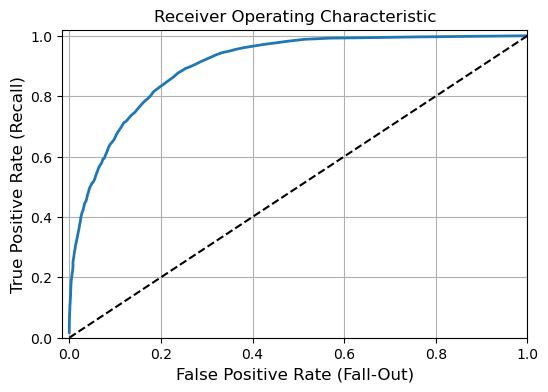

In [22]:
def plot_roc_curve(tpr, fpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
    plt.title('Receiver Operating Characteristic', fontsize=12)
    plt.axis([-0.015, 1.0, 0, 1.02])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12)
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.grid(True)

plt.figure(figsize=(6, 4))
plot_roc_curve(TPR, FPR)
plt.show()

**Code Check:** Next, compare your plot to the plot generated by Scikit-Learn's `roc_curve` function.  Use Scikit-Learn's `roc_curve` function to calculate the false positive rates, the true positive rates, and the thresholds.  Save the output using sklearn's function as `fpr`, `tpr`, and `thresholds`. 

In [23]:
from sklearn.metrics import roc_curve as sklearn_roc_curve

# Calculate ROC curve using Scikit-Learn's roc_curve function
fpr, tpr, thresholds = sklearn_roc_curve(true_labels, probs)


Pass the false positive rates and the true positive rates obtained above via the Scikit-Learn function as input to the `plot_roc_curve` function in order to compare ROC curves. These two plots should look the same.

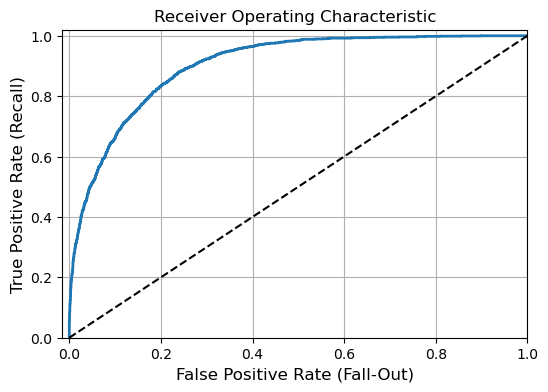

In [24]:
plt.figure(figsize=(6, 4))
plot_roc_curve(tpr, fpr)
plt.show()